In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import rlssm
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


/Users/oguz/Desktop/thesis-project/venv/lib/python3.11/site-packages/pystan/lookup.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
file_path = 'online_data_for_matlab.txt'
df = pd.read_csv(file_path)
summary_stats_path = 'summary_stats_subs.txt'
df_summary = pd.read_csv(summary_stats_path, sep='\t')

print(f"Number of rows in trial-by-trial df: {len(df)}")
print(f"Number of rows in summary stats df: {len(df_summary)}")
display(df.head())
display(df_summary.head())
print(df.columns)
print(f"Number of unique subjects: {df['subject_id'].nunique()}")



Number of rows in trial-by-trial df: 30200
Number of rows in summary stats df: 151


,subject_id,practice_trial,trial,transition,reward,choice_1,choice_2,rt_1,rt_2,state
0,sub1,real,1,common,1,1,1,1131.480,1457.620,2
1,sub1,real,2,common,0,1,1,639.000,483.590,2
2,sub1,real,3,rare,0,2,1,264.190,718.195,2
3,sub1,real,4,common,1,2,2,302.265,1507.225,3
4,sub1,real,5,rare,1,2,2,321.685,1751.195,2


,subID,age_group,age,sex,acc,med_rt,med_rt_correct,se_rt,fast_rt,browser_interactions,inv_e,num_trials,WASI_rawVerbal,WASI_raw_MR,WASI_Verbal_T,WASI_MR_T,WASI_IQ
0,sub1,Older adolescents,17.055556,Female,0.580000,7706.355,6096.5650,786.576919,0,2,13286.818965,50,41.0,23.0,62.0,59.0,118.0
1,sub10,Mid adolescents,13.972222,Female,0.705882,12091.015,8909.4975,1337.221094,0,2,17128.937917,34,38.0,23.0,65.0,64.0,125.0
2,sub100,Children,10.716667,Female,0.400000,498.390,581.0950,81.462882,17,6,1245.975000,80,NaN,NaN,NaN,NaN,NaN
3,sub101,Adults,18.477778,Female,0.550000,4888.820,4566.1025,213.750206,0,1,8888.763636,80,NaN,NaN,NaN,NaN,NaN
4,sub102,Adults,18.247222,Female,0.400000,6510.925,5205.8700,1092.515091,0,1,16277.312500,45,NaN,NaN,NaN,NaN,NaN


Index(['subject_id', 'practice_trial', 'trial', 'transition', 'reward',
       'choice_1', 'choice_2', 'rt_1', 'rt_2', 'state'],
      dtype='object')
Number of unique subjects: 151


In [4]:
# Cell 3: Filter for a single subject and prep data for RLSSM
subject_id = 'sub1'
df_subj = df[df['subject_id'] == subject_id].copy()

df_subj['block_label'] = 1
df_subj['trial_block'] = df_subj['trial']
df_subj['rt'] = df_subj['rt_2'] / 1000
df_subj['accuracy'] = df_subj['reward']
df_subj['f_cor'] = 1
df_subj['f_inc'] = 0
df_subj['cor_option'] = 1
df_subj['inc_option'] = 2

fit_df = df_subj[['trial_block', 'f_cor', 'f_inc', 'cor_option', 'inc_option',
                  'block_label', 'rt', 'accuracy']].copy()
display(fit_df.head())


,trial_block,f_cor,f_inc,cor_option,inc_option,block_label,rt,accuracy
0,1,1,0,1,2,1,1.457620,1
1,2,1,0,1,2,1,0.483590,0
2,3,1,0,1,2,1,0.718195,0
3,4,1,0,1,2,1,1.507225,1
4,5,1,0,1,2,1,1.751195,1


In [8]:
from rlssm.models_DDM import RLDDModel

model = RLDDModel(hierarchical_levels=1)


207 warnings generated.


In [5]:
fit_df = fit_df.loc[:, ~fit_df.columns.isin(['level_0', 'index'])]


Using cached StanModel
Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 0.2, 'sd': 0.2}
threshold_priors {'mu': 0.7, 'sd': 0.2}
ndt_priors {'mu': -1.2, 'sd': 0.1}


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Boundary separation[1] is inf, but must be finite!  (in 'unknown file name' at line 85)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Boundary separation[1] is inf, but must be finite!  (in 'unknown file name' at line 85)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informat


Gradient evaluation took 0.000289 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.89 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 500 [  0%]  (Warmup)
Iteration:  50 / 500 [ 10%]  (Warmup)
Iteration: 100 / 500 [ 20%]  (Warmup)
Iteration: 150 / 500 [ 30%]  (Warmup)
Iteration: 200 / 500 [ 40%]  (Warmup)
Iteration: 250 / 500 [ 50%]  (Warmup)
Iteration: 251 / 500 [ 50%]  (Sampling)
Iteration: 300 / 500 [ 60%]  (Sampling)
Iteration: 350 / 500 [ 70%]  (Sampling)
Iteration: 400 / 500 [ 80%]  (Sampling)
Iteration: 450 / 500 [ 90%]  (Sampling)
Iteration: 500 / 500 [100%]  (Sampling)

 Elapsed Time: 1.29463 seconds (Warm-up)
               0.66084 seconds (Sampling)
               1.95547 seconds (Total)

Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 250 iterations ended with a divergence (0.0%)
0 of 250 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


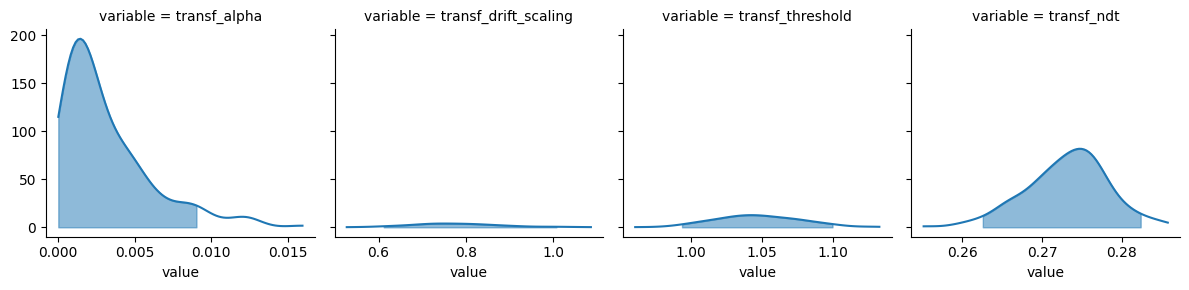

In [ ]:
from rlssm.models_DDM import RLDDModel
import numpy as np

# Filter out very fast RTs
fit_df = fit_df[fit_df['rt'] > 0.3]   # Even stricter than 0.2

# Tighter priors (choose values appropriate for your data/task):
tighter_priors = {
    'alpha_priors':           {'mu': 0,    'sd': 1},   # learning rate (on logit scale)
    'drift_scaling_priors':   {'mu': 0.2,  'sd': 0.2}, # drift scaling (on log scale; exp(0.2) ≈ 1.22)
    'threshold_priors':       {'mu': 0,  'sd': 0.1}, # boundary (on log scale; exp(0.7) ≈ 2.01)
    'ndt_priors':             {'mu': -1.2, 'sd': 0.1}, # ndt (on log scale; exp(-1.2) ≈ 0.30s)
}

model = RLDDModel(hierarchical_levels=1)

fit_result = model.fit(
    data=fit_df,
    K=2,
    initial_value_learning=0.5,
    iter=500,          # Use more for final fits
    chains=1,           # 2+ chains for stability
    alpha_priors=tighter_priors['alpha_priors'],
    drift_scaling_priors=tighter_priors['drift_scaling_priors'],
    threshold_priors=tighter_priors['threshold_priors'],
    ndt_priors=tighter_priors['ndt_priors'],
    control={'adapt_delta': 0.99}
)

# To view posterior distributions
fit_result.plot_posteriors()


In [7]:
import numpy as np
samples = fit_result.samples

alpha = 1 / (1 + np.exp(-samples['transf_alpha']))          # learning rate [0,1]
drift = np.exp(samples['transf_drift_scaling'])             # drift scaling
threshold = np.exp(samples['transf_threshold'])             # boundary separation
ndt = np.exp(samples['transf_ndt'])                         # non-decision time

print(f"Learning rate (alpha): mean={alpha.mean():.3f}, sd={alpha.std():.3f}")
print(f"Drift rate (v): mean={drift.mean():.3f}, sd={drift.std():.3f}")
print(f"Boundary (a): mean={threshold.mean():.3f}, sd={threshold.std():.3f}")
print(f"Non-decision time (ndt): mean={ndt.mean():.3f}, sd={ndt.std():.3f}")


Learning rate (alpha): mean=0.501, sd=0.001
Drift rate (v): mean=2.193, sd=0.231
Boundary (a): mean=2.852, sd=0.085
Non-decision time (ndt): mean=1.314, sd=0.007


,trial_block,f_cor,f_inc,cor_option,inc_option,block_label,rt,accuracy
12600,1,1,0,1,2,1,1.329,0
12601,2,1,0,1,2,1,0.410,1
12602,3,1,0,1,2,1,0.478,1
12603,4,1,0,1,2,1,0.354,1
12604,5,1,0,1,2,1,0.543,0


Using cached StanModel
Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 0.2, 'sd': 0.2}
threshold_priors {'mu': 0.7, 'sd': 0.2}
ndt_priors {'mu': -1.2, 'sd': 0.1}


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 1.329, but must be greater than nondecision time = 53.6019  (in 'unknown file name' at line 85)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 1.329, but must be greater than nondecision time = 53.3884  (in 'unknown file name' at line 85)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be eith


Gradient evaluation took 0.000374 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.74 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 500 [  0%]  (Warmup)
Iteration:  50 / 500 [ 10%]  (Warmup)
Iteration: 100 / 500 [ 20%]  (Warmup)
Iteration: 150 / 500 [ 30%]  (Warmup)
Iteration: 200 / 500 [ 40%]  (Warmup)
Iteration: 250 / 500 [ 50%]  (Warmup)
Iteration: 251 / 500 [ 50%]  (Sampling)
Iteration: 300 / 500 [ 60%]  (Sampling)
Iteration: 350 / 500 [ 70%]  (Sampling)
Iteration: 400 / 500 [ 80%]  (Sampling)
Iteration: 450 / 500 [ 90%]  (Sampling)
Iteration: 500 / 500 [100%]  (Sampling)

 Elapsed Time: 3.32186 seconds (Warm-up)
               1.53362 seconds (Sampling)
               4.85548 seconds (Total)

Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 250 iterations ended with a divergence (0.0%)
0 of 250 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
Learning 

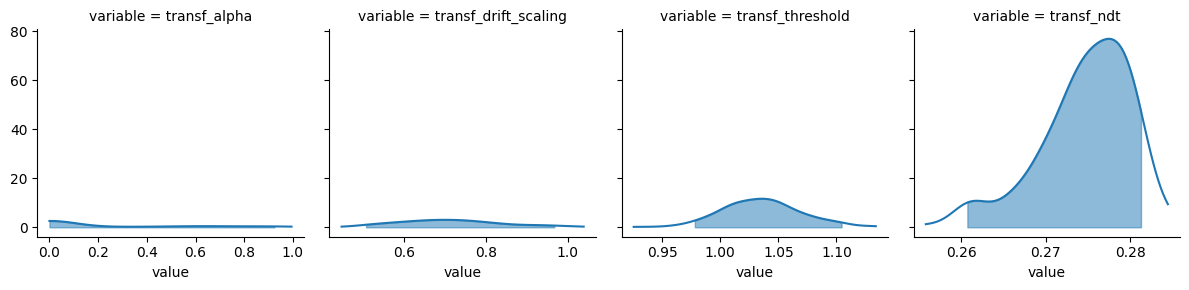

In [8]:
# For subject 2
subject_id = 'sub2'
df_subj2 = df[df['subject_id'] == subject_id].copy()

df_subj2['block_label'] = 1
df_subj2['trial_block'] = df_subj2['trial']
df_subj2['rt'] = df_subj2['rt_2'] / 1000
df_subj2['accuracy'] = df_subj2['reward']
df_subj2['f_cor'] = 1
df_subj2['f_inc'] = 0
df_subj2['cor_option'] = 1
df_subj2['inc_option'] = 2

fit_df2 = df_subj2[['trial_block', 'f_cor', 'f_inc', 'cor_option', 'inc_option',
                  'block_label', 'rt', 'accuracy']].copy()
display(fit_df2.head())


fit_df2 = fit_df2.loc[:, ~fit_df2.columns.isin(['level_0', 'index'])]

from rlssm.models_DDM import RLDDModel
import numpy as np

# Filter out very fast RTs
fit_df2 = fit_df2[fit_df2['rt'] > 0.3]   # Even stricter than 0.2

# Tighter priors (choose values appropriate for your data/task):
tighter_priors = {
    'alpha_priors':           {'mu': 0,    'sd': 1},   # learning rate (on logit scale)
    'drift_scaling_priors':   {'mu': 0.2,  'sd': 0.2}, # drift scaling (on log scale; exp(0.2) ≈ 1.22)
    'threshold_priors':       {'mu': 0.7,  'sd': 0.2}, # boundary (on log scale; exp(0.7) ≈ 2.01)
    'ndt_priors':             {'mu': -1.2, 'sd': 0.1}, # ndt (on log scale; exp(-1.2) ≈ 0.30s)
}

model = RLDDModel(hierarchical_levels=1)

fit_result = model.fit(
    data=fit_df2,
    K=2,
    initial_value_learning=0.5,
    iter=500,          # Use more for final fits
    chains=1,           # 2+ chains for stability
    alpha_priors=tighter_priors['alpha_priors'],
    drift_scaling_priors=tighter_priors['drift_scaling_priors'],
    threshold_priors=tighter_priors['threshold_priors'],
    ndt_priors=tighter_priors['ndt_priors'],
    control={'adapt_delta': 0.99}
)

# To view posterior distributions
fit_result.plot_posteriors()

samples = fit_result.samples

alpha = 1 / (1 + np.exp(-samples['transf_alpha']))          # learning rate [0,1]
drift = np.exp(samples['transf_drift_scaling'])             # drift scaling
threshold = np.exp(samples['transf_threshold'])             # boundary separation
ndt = np.exp(samples['transf_ndt'])                         # non-decision time

print(f"Learning rate (alpha): mean={alpha.mean():.3f}, sd={alpha.std():.3f}")
print(f"Drift rate (v): mean={drift.mean():.3f}, sd={drift.std():.3f}")
print(f"Boundary (a): mean={threshold.mean():.3f}, sd={threshold.std():.3f}")
print(f"Non-decision time (ndt): mean={ndt.mean():.3f}, sd={ndt.std():.3f}")


,trial_block,f_cor,f_inc,cor_option,inc_option,block_label,rt,accuracy
19400,1,1,0,1,2,1,0.833,0
19401,2,1,0,1,2,1,0.685,0
19402,3,1,0,1,2,1,1.248,1
19403,4,1,0,1,2,1,1.147,0
19404,5,1,0,1,2,1,0.472,1


Using cached StanModel
Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 0.2, 'sd': 0.2}
threshold_priors {'mu': 0.7, 'sd': 0.2}
ndt_priors {'mu': -1.2, 'sd': 0.1}
Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: wiener_lpdf: Random variable  = 0.833, but must be greater than nondecision time = 1.85849  (in 'unknown file name' at line 85)


Gradient evaluation took 0.000388 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.88 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1200 / 2000 [ 60%]  (Sampling)
Iteration: 1400 / 2000 [ 70%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sa

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Boundary separation[1] is inf, but must be finite!  (in 'unknown file name' at line 85)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Boundary separation[1] is inf, but must be finite!  (in 'unknown file name' at line 85)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be 


Gradient evaluation took 0.000206 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.06 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1200 / 2000 [ 60%]  (Sampling)
Iteration: 1400 / 2000 [ 70%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sampling)
Iteration: 1800 / 2000 [ 90%]  (Sampling)
Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 6.46407 seconds (Warm-up)
               7.3551 seconds (Sampling)
               13.8192 seconds (Total)

Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 2000 iterations ended with a divergence (0.0%)
0 of 2000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathol

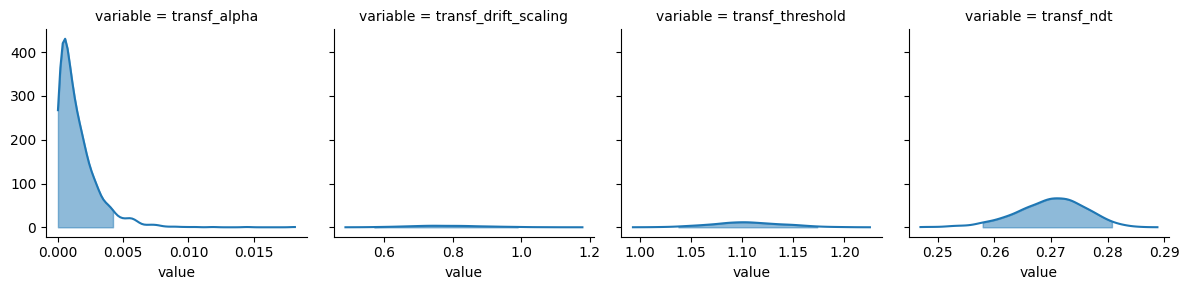

In [11]:
# For subject 50
subject_id = 'sub50'
df_subj50 = df[df['subject_id'] == subject_id].copy()

df_subj50['block_label'] = 1
df_subj50['trial_block'] = df_subj50['trial']
df_subj50['rt'] = df_subj50['rt_2'] / 1000
df_subj50['accuracy'] = df_subj50['reward']
df_subj50['f_cor'] = 1
df_subj50['f_inc'] = 0
df_subj50['cor_option'] = 1
df_subj50['inc_option'] = 2

fit_df50 = df_subj50[['trial_block', 'f_cor', 'f_inc', 'cor_option', 'inc_option',
                      'block_label', 'rt', 'accuracy']].copy()
display(fit_df50.head())

# Remove any accidental index columns
fit_df50 = fit_df50.loc[:, ~fit_df50.columns.isin(['level_0', 'index'])]

from rlssm.models_DDM import RLDDModel
import numpy as np

# Filter out very fast RTs
fit_df50 = fit_df50[fit_df50['rt'] > 0.3]

# Tighter priors
tighter_priors = {
    'alpha_priors':           {'mu': 0,    'sd': 1},
    'drift_scaling_priors':   {'mu': 0.2,  'sd': 0.2},
    'threshold_priors':       {'mu': 0.7,  'sd': 0.2},
    'ndt_priors':             {'mu': -1.2, 'sd': 0.1},
}

model = RLDDModel(hierarchical_levels=1)

fit_result = model.fit(
    data=fit_df50,
    K=2,
    initial_value_learning=0.5,
    iter=2000,
    chains=2,
    alpha_priors=tighter_priors['alpha_priors'],
    drift_scaling_priors=tighter_priors['drift_scaling_priors'],
    threshold_priors=tighter_priors['threshold_priors'],
    ndt_priors=tighter_priors['ndt_priors'],
    control={'adapt_delta': 0.99},
    n_jobs=1  # Use 1 job for simplicity; adjust as needed
)

# To view posterior distributions
fit_result.plot_posteriors()

samples = fit_result.samples

alpha = 1 / (1 + np.exp(-samples['transf_alpha']))          # learning rate [0,1]
drift = np.exp(samples['transf_drift_scaling'])             # drift scaling
threshold = np.exp(samples['transf_threshold'])             # boundary separation
ndt = np.exp(samples['transf_ndt'])                         # non-decision time

print(f"Learning rate (alpha): mean={alpha.mean():.3f}, sd={alpha.std():.3f}")
print(f"Drift rate (v): mean={drift.mean():.3f}, sd={drift.std():.3f}")
print(f"Boundary (a): mean={threshold.mean():.3f}, sd={threshold.std():.3f}")
print(f"Non-decision time (ndt): mean={ndt.mean():.3f}, sd={ndt.std():.3f}")
